### Which Vendor is Charging Too Much?

I recently purchased three pairs of tickets to live events.  Each purchase went through a different vendor; lets call them 'TM', 'ET', and 'TW'.  All three purchases were for a pair of tickets at the lowest possible service category (think "general admission").  I noticed that the add-on costs for the tickets appeared to be inconsistent across vendors, but I was curious to see how these three vendors stacked up against each other. 

#### I decided to look at a few things:

1. What does the data look like?
2. How do the total & add-on costs compare across vendors?
3. How do the base & add-on costs compare as a percentage of the total cost (for each vendor)?

### 1. Loading data in MySQL

The first step used was to create the table in MySQL.  For this task I used XAMPP & pypMyAdmin (although I sometimes use postgreSQL too).
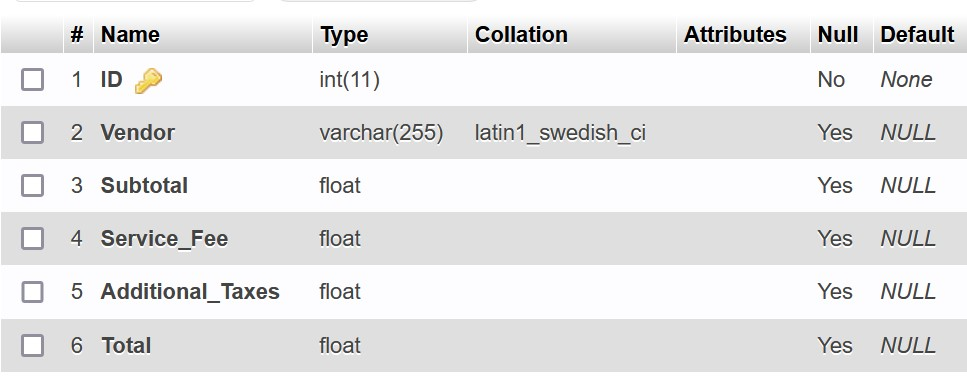

The next step was to load the data (note that while most values are directly assigned, I also used a mathematical operation for one value because that's how the data was represented by the vendor)
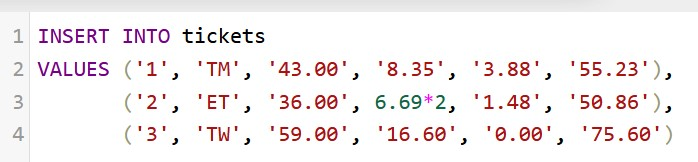

Then I exported the table to a csv file for use with Python
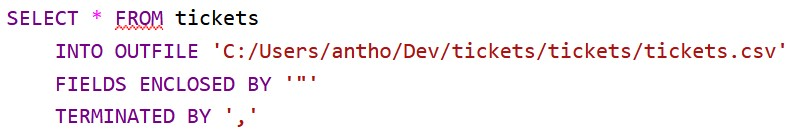

### 2. Looking at the data 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rc

In [2]:
df = pd.read_csv('C:\\Users\\antho\\Dev\\tickets\\tickets\\tickets.csv', header=None)

In [3]:
df

,0,1,2,3,4,5
0,1,TM,43,8.35,3.88,55.23
1,2,ET,36,13.38,1.48,50.86
2,3,TW,59,16.60,0.00,75.60


Uh-oh.  I forgot to save the headers with the MySQL statement that created the csv file.  I can fix that there & repeat the export, but I'll do it here since we won't be using the MySQL file again!

In [4]:
df = pd.read_csv('C:\\Users\\antho\\Dev\\tickets\\tickets\\tickets.csv', header=None, names = ['ID', 'Vendor', 'Subtotal', 'Service_Fee', 'Additional_Taxes', 'Total'])

In [5]:
df

,ID,Vendor,Subtotal,Service_Fee,Additional_Taxes,Total
0,1,TM,43,8.35,3.88,55.23
1,2,ET,36,13.38,1.48,50.86
2,3,TW,59,16.60,0.00,75.60


That's better.  This table is about as simple as it gets*, but lets look at some descriptive data:

*: Ideally, I'd have bought a large quantity of tickets from each vendor at multiple service levels and would have then grouped by Vendor (and with enough observations would also have either used SQL's "Group by" & "Having" functions or Python's "Groupby" (and maybe "Filter") functions.  But time is money, and I wasn't looking for professional-level analysis here; I was just curious.  

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3 non-null      int64  
 1   Vendor            3 non-null      object 
 2   Subtotal          3 non-null      int64  
 3   Service_Fee       3 non-null      float64
 4   Additional_Taxes  3 non-null      float64
 5   Total             3 non-null      float64
dtypes: float64(3), int64(2), object(1)
memory usage: 272.0+ bytes


In [7]:
df.describe()

,ID,Subtotal,Service_Fee,Additional_Taxes,Total
count,3.0,3.000000,3.000000,3.000000,3.000000
mean,2.0,46.000000,12.776667,1.786667,60.563333
std,1.0,11.789826,4.157960,1.958094,13.204175
min,1.0,36.000000,8.350000,0.000000,50.860000
25%,1.5,39.500000,10.865000,0.740000,53.045000
50%,2.0,43.000000,13.380000,1.480000,55.230000
75%,2.5,51.000000,14.990000,2.680000,65.415000
max,3.0,59.000000,16.600000,3.880000,75.600000


Observations:
 - ID functioned as an index in the MySQL table.
 - Vendor is text data.  It is the name of the organization selling tickets.  There is no duplication, so no grouping will be required.
 - Subtotal is the base cost of two tickets (each of these 3 records has two tickets).
 - Service_Fee & Additional_Taxes are "add on" costs.  There is clearly a difference in how each organization does this, as the values are very different and taxes are spread out in different categories.
 - Total is the total price of 2 tickets
 - Average Subtotal is \\$46, and Average Total is \\$60.56.  That means that the total average of add-on charges is \\$14.56.
 - Maximum Total cost for two tickets is \\$75.60, while minimum Total cost is \\$50.86

### 3. Comparing total and add-on costs across vendors

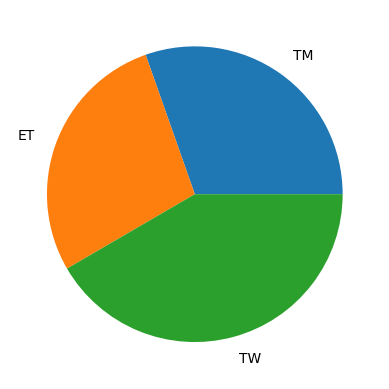

In [8]:
# Pieplot of total costs
names=tuple(list(df['Vendor']))
values=np.array(df['Total'])
plt.pie(values, labels=names, labeldistance=1.15)
plt.show()

As frequently occurs with Pie Charts, this doesn't provide much insight.  If we had more data from each vendor I'd prefer to use a boxplot, but with only one data point for each vendor there is no distribution to plot.  Lets move on to a bar plot instead.  

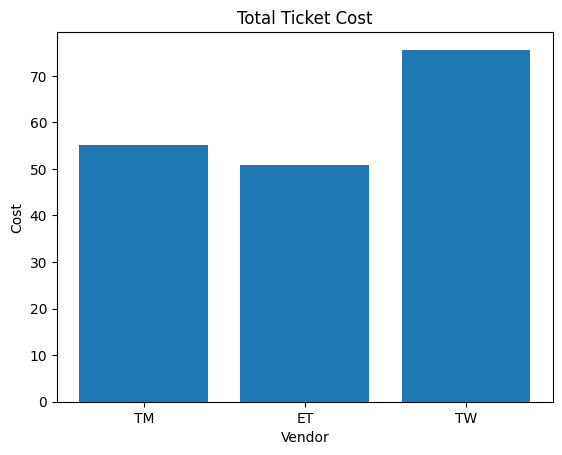

In [9]:
# Barplot of total costs
names=tuple(list(df['Vendor']))
values=np.array(df['Total'])
y_pos=np.arange(len(names))
plt.bar(y_pos, values)
plt.xticks(y_pos, names)
plt.ylabel('Cost')
plt.xlabel('Vendor')
plt.title('Total Ticket Cost')
plt.show()

Fabulous, now we are getting somewhere.  How much of this is made up of add-on fees?

In [10]:
# Transpose df to crate arrays for bars.  Doing it this way becuase I hardly ever transpose arrays, so I just wanted to do it this way.
dft = df.T
dft = dft.drop(['ID','Vendor'])

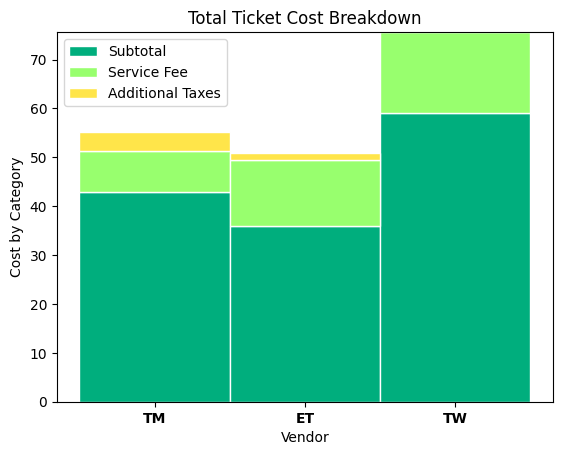

In [11]:
# Stacked Barplot of costs
names= np.array(df['Vendor'])
Subtotal = np.array(dft.iloc[0])
Service_Fee = np.array(dft.iloc[1])
Additional_Taxes = np.array(dft.iloc[2])

bars = np.add(Subtotal, Service_Fee).tolist()

r = [0,1,2]

barWidth=1

plt.bar(r, Subtotal, color='#00ae7d', edgecolor='white', width=barWidth, label = 'Subtotal')
plt.bar(r, Service_Fee, bottom = Subtotal, color='#98ff6e', edgecolor='white', width = barWidth, label = 'Service Fee')
plt.bar(r, Additional_Taxes, bottom=bars, color='#ffe54a', edgecolor='white', width=barWidth, label = 'Additional Taxes')

plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")

# Create legend and title
plt.legend()
plt.ylabel('Cost by Category')
plt.xlabel('Vendor')
plt.title('Total Ticket Cost Breakdown')

plt.show()

Observations:
 - TW has the highest Subtotal, but no Additional Taxes.

Will this be easier to interpret if we reorder the categories?

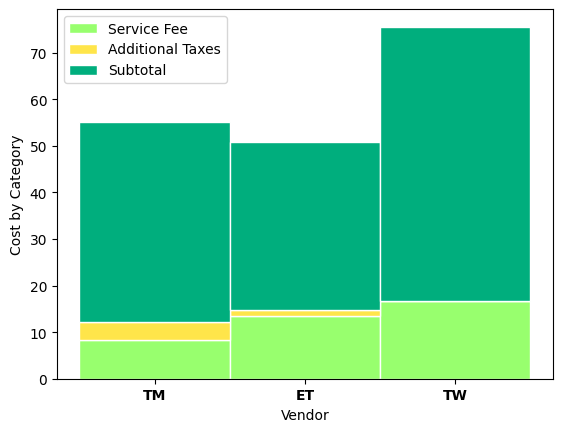

In [12]:
# Stacked Barplot of costs
names= np.array(df['Vendor'])
Subtotal = np.array(dft.iloc[0])
Service_Fee = np.array(dft.iloc[1])
Additional_Taxes = np.array(dft.iloc[2])

bars = np.add(Additional_Taxes, Service_Fee).tolist()

r = [0,1,2]

barWidth=1

plt.bar(r, Service_Fee, color='#98ff6e', edgecolor='white', width = barWidth, label = 'Service Fee')
plt.bar(r, Additional_Taxes, bottom=Service_Fee, color='#ffe54a', edgecolor='white', width=barWidth, label = 'Additional Taxes')
plt.bar(r, Subtotal, bottom = bars, color='#00ae7d', edgecolor='white', width=barWidth, label = 'Subtotal')

plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")

# Create legend
plt.legend()
plt.ylabel('Cost by Category')
plt.xlabel('Vendor')

plt.show()

Observations:
 - Now we can see a ranking of which vendor has the highest total fees (TW) and the lowest (TM)

Lets also do this as a Percent Stacked Barchart.  This allows us to compare how much of each dollar spent is used for fees (regardless of different subtotal values)

### 4. Comparing base and add-on costs as a percentage of the total cost

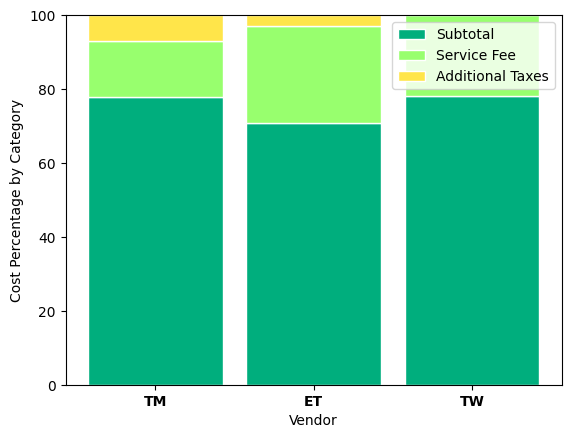

In [13]:
# Stacked Barplot of costs

r = [0,1,2]
Subtotal = np.array(dft.iloc[0])
Service_Fee = np.array(dft.iloc[1])
Additional_Taxes = np.array(dft.iloc[2])

totals = [i+j+k for i,j,k in zip(Subtotal, Service_Fee, Additional_Taxes)]
Subtotal_ = [i/j*100 for i,j in zip(Subtotal, totals)]
Service_Fee_ = [i/j*100 for i,j in zip(Service_Fee, totals)]
Additional_Taxes_ = [i/j*100 for i,j in zip(Additional_Taxes, totals)]

barWidth=0.85
names= np.array(df['Vendor'])

plt.bar(r, Subtotal_, color='#00ae7d', edgecolor='white', width=barWidth, label = 'Subtotal')
plt.bar(r, Service_Fee_, bottom = Subtotal_, color='#98ff6e', edgecolor='white', width = barWidth, label = 'Service Fee')
plt.bar(r, Additional_Taxes_, bottom=[i+j for i,j in zip(Subtotal_, Service_Fee_)], color='#ffe54a', edgecolor='white', width=barWidth, label = 'Additional Taxes')

plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")

# Create legend
plt.legend()
plt.ylabel('Cost Percentage by Category')
plt.xlabel('Vendor')

plt.show()

Observations:
 - ET charges the highest in add-ons as a percentage of total cost.

Using a percentage bar chart there is no need to reorder.  We can read "top-down" to see that ET has the highest fees per dollar spent on actual product (event tickets).  TM and TW have very similar overall fees, even though they name them differently.  Lets do a quick non-visual comparison to see the difference (since it is hard to see here graphically).

In [14]:
# Quick look at the dataframe so we don't have to scroll all the way up
df

,ID,Vendor,Subtotal,Service_Fee,Additional_Taxes,Total
0,1,TM,43,8.35,3.88,55.23
1,2,ET,36,13.38,1.48,50.86
2,3,TW,59,16.60,0.00,75.60


In [15]:
TM_fees = df.iloc[0,3]+df.iloc[0,4]
ET_fees = df.iloc[1,3]+df.iloc[1,4]
TW_fees = df.iloc[2,3]+df.iloc[2,4]

In [16]:
print("Raw numbers (not percentage):")
print("TM combined fees are ", TM_fees)
print("ET combined fees are ", ET_fees)
print("TW combined fees are ", TW_fees)

Raw numbers (not percentage):
TM combined fees are  12.23
ET combined fees are  14.860000000000001
TW combined fees are  16.6


Oh no!  I induced a floating point error.  I can prevent this by doing the following:

In [17]:
from decimal import *
getcontext().prec = 4 #set precision to two decimal places
print("Raw numbers (not percentage):")
print("TM combined fees are ", TM_fees)
ET_fees = Decimal(df.iloc[1,3])+Decimal(df.iloc[1,4]) #redo the math using Decimal()
print("ET combined fees are ", ET_fees)
print("TW combined fees are ", TW_fees)

Raw numbers (not percentage):
TM combined fees are  12.23
ET combined fees are  14.86
TW combined fees are  16.6


In [18]:
TM_pct = Service_Fee_[0] + Additional_Taxes_[0]
ET_pct = Service_Fee_[1] + Additional_Taxes_[1]
TW_pct = Service_Fee_[2] + Additional_Taxes_[2]

In [19]:
print("Percentage of Totals which are Combined Fees:")
print("TM combined fees percentage = ", TM_pct)
print("ET combined fees percentage = ", ET_pct)
print("TW combined fees percentage = ", TW_pct)

Percentage of Totals which are Combined Fees:
TM combined fees percentage =  22.143762447944955
ET combined fees percentage =  29.217459693275657
TW combined fees percentage =  21.957671957671963


Observations:
 - We can see here that, as a percentage of total price paid, ET has the highest fee rate, followed in order by TM and then TW.
 - TM is just barely more expensive than TW (in regards to fees charged as a percentage of total cost)

### Takeaways & Recommendation:
 - Vendor ET had the lowest total cost, but the highest percentage of add-on fees.
 - Vendor TW had the highest total cost, but the lowest percentage of add-on fees.
 - Individual add-on fees don't matter; it is the cumulative add-on fees that do.
 
**Recommendation:**
 - As a purchaser: Unless purchase options are available that enable avoidance of excess fees, it makes sense to ignore the fee breakdown and consider only the total price when making a purchase.  
 - As an artist: add-on costs can add significantly to the customer's overall price (which can potentially impact merchandise sales).  Ensure these costs are monitored and managed where possible.
 - As a ticket vendor: Optimization of add-on fees to ensure fairness to both artists and ticket purchasers may enable customers to make more on-site purchases (like drinks and food, for example) that may increase overall profits and create happier customers on all fronts.